# Objective

## We want to see which jobs are most required and what we can do to be qualified to it.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [137]:
df=pd.read_csv('job_postings.csv')

In [4]:
df.head()

,Unnamed: 0,Job Posting ID,Job Posting Date,Job Title,Job Title Full,Job Title Additional Info,Job Position Type,Job Position Level,Years of Experience,Job Skills,Job Location,Minimum Pay,Maximum Pay,Pay Rate,Number of Applicants,Company Name,Company Industry,Company Size
0,0,2701524240,01/01/2017,Software Engineer,Software Engineer,Java Full Stack | Remote,Full-time,Entry level,1,"['database', 'javascript', 'agile', 'linux', '...",United States,NaN,NaN,NaN,6.0,"Cardinal Financial Company, Limited Partnership",Financial Services,"1,001-5,000 employees"
1,1,2719108338,01/01/2017,Data Engineer,Senior Azure Data Engineer,NaN,Full-time,Mid-Senior level,2,"['data_lake', 'cloud', 'python', 'spark', 'git...",United States,NaN,NaN,NaN,1.0,Brinks Home,Consumer Electronics,"1,001-5,000 employees"
2,2,2719503370,01/01/2017,Software Engineer,Software Engineer I,NaN,Full-time,Entry level,5,"['mongo', 'oracle', 'microsoft', 'css', 'javas...",United States,NaN,NaN,NaN,16.0,Paycor,Computer Software,"1,001-5,000 employees"
3,3,2734877741,01/01/2017,Business Analyst,Associate Business Analyst,Telecommute,Full-time,Entry level,2,"['agile', 'excel']","Phoenix, AZ",NaN,NaN,NaN,1.0,Optum,Hospital & Health Care,"10,001+ employees"
4,4,2752415616,01/01/2017,Developer,Swift Developer,NaN,Contract,Mid-Senior level,4,"['excel', 'back-end', 'ios', 'swift', 'program...","Richmond, CA",NaN,NaN,NaN,NaN,Toptal,Internet,"1,001-5,000 employees"


In [5]:
df.shape

(25114, 18)

In [6]:
df.info

<bound method DataFrame.info of        Unnamed: 0  Job Posting ID Job Posting Date           Job Title  \
0               0      2701524240       01/01/2017   Software Engineer   
1               1      2719108338       01/01/2017       Data Engineer   
2               2      2719503370       01/01/2017   Software Engineer   
3               3      2734877741       01/01/2017    Business Analyst   
4               4      2752415616       01/01/2017           Developer   
...           ...             ...              ...                 ...   
25109       25111      2716720162       31/12/2021      Data Scientist   
25110       25112      2718798584       31/12/2021   Software Engineer   
25111       25113      2704879988       31/12/2021  Software Developer   
25112       25114      2681954943       31/12/2021      Data Architect   
25113       25115      2696128307       31/12/2021       Data Engineer   

                               Job Title Full Job Title Additional Info  \
0   

# Check for Nulls

In [138]:
df.isna().sum()

hii                              0
Job Posting ID                   0
Job Posting Date                 0
Job Title                        0
Job Title Full                   0
Job Title Additional Info    16927
Job Position Type                0
Job Position Level               0
Years of Experience              0
Job Skills                       0
Job Location                     0
Minimum Pay                  23302
Maximum Pay                  23302
Pay Rate                     23302
Number of Applicants          7585
Company Name                    61
Company Industry               219
Company Size                   222
dtype: int64

In [139]:
null=df.isna().sum()
print("Job Title Additional Info: ",np.round(null[5]/25114*100),"%")
print("Minimum Pay: ",np.round(null[11]/25114*100),"%")
print("Maximum Pay: ",np.round(null[12]/25114*100),"%")
print("Pay Rate:",np.round(null[13]/25114*100),"%")
print("Number of Applicants:",np.round(null[14]/25114*100),"%")
print("Company Name :",np.round(null[15]/25114*100),"%")
print("Company Industry:",np.round(null[16]/25114*100),"%")
print("Company Size :",np.round(null[17]/25114*100),"%")

Job Title Additional Info:  67.0 %
Minimum Pay:  93.0 %
Maximum Pay:  93.0 %
Pay Rate: 93.0 %
Number of Applicants: 30.0 %
Company Name : 0.0 %
Company Industry: 1.0 %
Company Size : 1.0 %


# As columns of Job Title Additional Info,Minimum Pay,Maximum Pay and Pay Rate there percentage is very high so we will drop it.

In [140]:
df.drop('Job Title Additional Info',axis=1,inplace=True)
df.drop('Minimum Pay',axis=1,inplace=True)
df.drop('Maximum Pay',axis=1,inplace=True)
df.drop('Pay Rate',axis=1,inplace=True)

In [141]:
df.isna().sum()

hii                        0
Job Posting ID             0
Job Posting Date           0
Job Title                  0
Job Title Full             0
Job Position Type          0
Job Position Level         0
Years of Experience        0
Job Skills                 0
Job Location               0
Number of Applicants    7585
Company Name              61
Company Industry         219
Company Size             222
dtype: int64

# As columns of Company Name,Company Industry and Company Size there percentage is so small so we will these rows.

In [142]:
df.dropna(subset=["Company Name"],inplace =True)
df.dropna(subset=["Company Industry"],inplace =True)
df.dropna(subset=["Company Size"],inplace =True)

In [143]:
df.isna().sum()

hii                        0
Job Posting ID             0
Job Posting Date           0
Job Title                  0
Job Title Full             0
Job Position Type          0
Job Position Level         0
Years of Experience        0
Job Skills                 0
Job Location               0
Number of Applicants    7544
Company Name               0
Company Industry           0
Company Size               0
dtype: int64

# As the column of Number of Applicants is 30% we will replace it with the mean

In [145]:
df['Number of Applicants']=df['Number of Applicants'].fillna(df['Number of Applicants'].mean())

In [146]:
df.isna().sum()

hii                     0
Job Posting ID          0
Job Posting Date        0
Job Title               0
Job Title Full          0
Job Position Type       0
Job Position Level      0
Years of Experience     0
Job Skills              0
Job Location            0
Number of Applicants    0
Company Name            0
Company Industry        0
Company Size            0
dtype: int64

In [147]:
df.shape

(24830, 14)

# Let's take a look on the data after the changes We have made.

In [28]:
df.head(15)

,Unnamed: 0,Job Posting ID,Job Posting Date,Job Title,Job Title Full,Job Position Type,Job Position Level,Years of Experience,Job Skills,Job Location,Number of Applicants,Company Name,Company Industry,Company Size
0,0,2701524240,01/01/2017,Software Engineer,Software Engineer,Full-time,Entry level,1,"['database', 'javascript', 'agile', 'linux', '...",United States,6.000000,"Cardinal Financial Company, Limited Partnership",Financial Services,"1,001-5,000 employees"
1,1,2719108338,01/01/2017,Data Engineer,Senior Azure Data Engineer,Full-time,Mid-Senior level,2,"['data_lake', 'cloud', 'python', 'spark', 'git...",United States,1.000000,Brinks Home,Consumer Electronics,"1,001-5,000 employees"
2,2,2719503370,01/01/2017,Software Engineer,Software Engineer I,Full-time,Entry level,5,"['mongo', 'oracle', 'microsoft', 'css', 'javas...",United States,16.000000,Paycor,Computer Software,"1,001-5,000 employees"
3,3,2734877741,01/01/2017,Business Analyst,Associate Business Analyst,Full-time,Entry level,2,"['agile', 'excel']","Phoenix, AZ",1.000000,Optum,Hospital & Health Care,"10,001+ employees"
4,4,2752415616,01/01/2017,Developer,Swift Developer,Contract,Mid-Senior level,4,"['excel', 'back-end', 'ios', 'swift', 'program...","Richmond, CA",14.829052,Toptal,Internet,"1,001-5,000 employees"
5,5,2697854773,01/01/2017,Data Engineer,Aws Data Engineer,Full-time,Mid-Senior level,6,"['data_lake', 'cloud', 'data_lakes', 'python',...","Los Angeles, CA",14.829052,ClearScale,Information Technology & Services,51-200 employees
6,6,2723260660,01/01/2017,Software Developer,Software Developer (Node.Js,Full-time,Mid-Senior level,4,"['database', 'pl/sql', 'cloud', 'javascript', ...","Rochester, NY",9.000000,Ellucian,Higher Education,"1,001-5,000 employees"
7,7,2628572485,01/01/2017,Data Analyst,Healthcare Payer Data Analyst,Full-time,Associate,5,"['data_lake', 'database', 'python', 'hadoop', ...","Charleston, SC",25.000000,Perficient,Information Technology & Services,"1,001-5,000 employees"
8,8,2748225724,01/01/2017,Data Engineer,Senior Data Engineer,Full-time,Mid-Senior level,9,"['python', 'programming', 'etl', 'postgresql',...","Baltimore, MD",5.000000,Medix Technology,Information Technology & Services,201-500 employees
9,9,2681258907,02/01/2017,Business Intelligence Analyst,Jr. Business Intelligence Analyst,Contract,Mid-Senior level,4,"['r', 'scala', 'powershell', 'c++', 'java', 'p...","Raleigh, NC",100.000000,OnDemand Agility Solutions,Information Technology & Services,"1,001-5,000 employees"


# Check for Outliers

In [29]:
df.describe()

,Unnamed: 0,Job Posting ID,Years of Experience,Number of Applicants
count,24830.000000,2.483000e+04,24830.000000,24830.000000
mean,12558.410028,2.688180e+09,4.334676,14.829052
std,7249.117747,6.197595e+07,2.234427,19.610651
min,0.000000,1.756096e+09,0.000000,1.000000
25%,6283.250000,2.678739e+09,3.000000,3.000000
50%,12561.500000,2.696058e+09,4.000000,14.000000
75%,18829.750000,2.721750e+09,6.000000,14.829052
max,25115.000000,2.797780e+09,25.000000,200.000000


<AxesSubplot:>

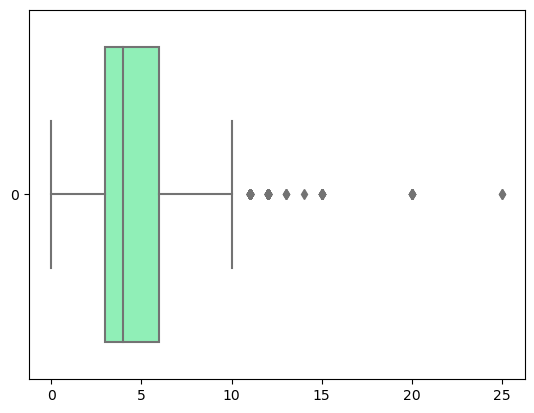

In [37]:
sns.boxplot(data=df['Years of Experience'],palette='rainbow',orient='h')

## We found Outlier so we will replace it with the maximum value we have.

In [39]:
Q1 = df['Years of Experience'].quantile(0.25)
Q3 = df['Years of Experience'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Years of Experience']=np.where(df['Years of Experience']>upper_whisker,upper_whisker,np.where(df['Years of Experience']<lower_whisker,lower_whisker,df['Years of Experience']))

<AxesSubplot:>

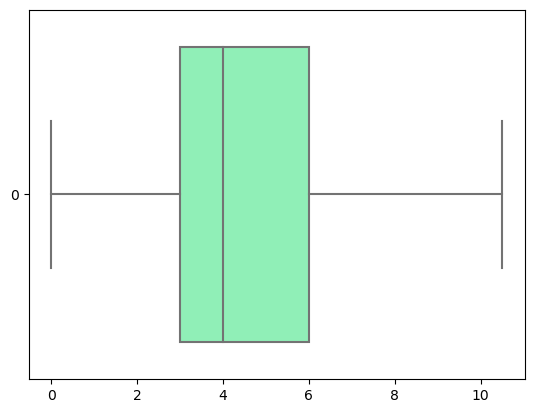

In [40]:
sns.boxplot(data=df['Years of Experience'],palette='rainbow',orient='h')

<AxesSubplot:>

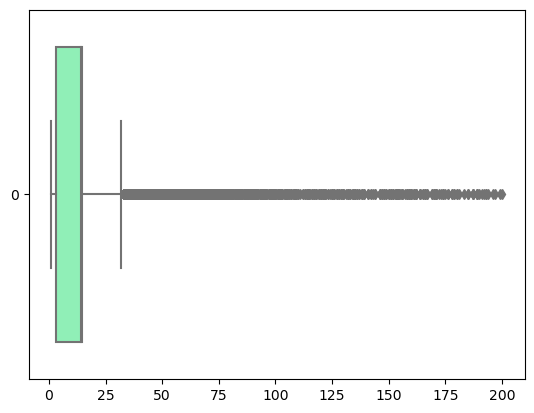

In [41]:
sns.boxplot(data=df['Number of Applicants'],palette='rainbow',orient='h')

/Users/habibaalaa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number of Applicants', ylabel='Density'>

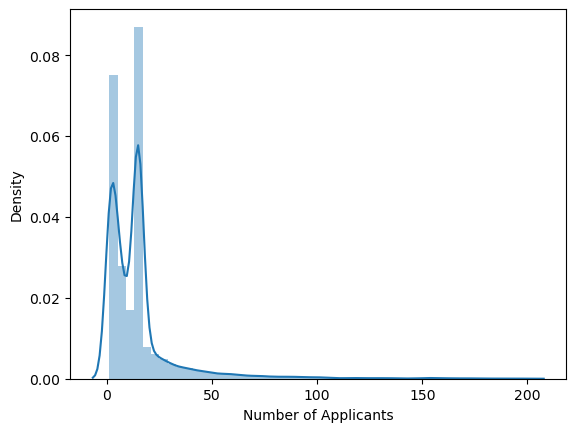

In [46]:
sns.distplot(df['Number of Applicants'])

<AxesSubplot:xlabel='Years of Experience', ylabel='Count'>

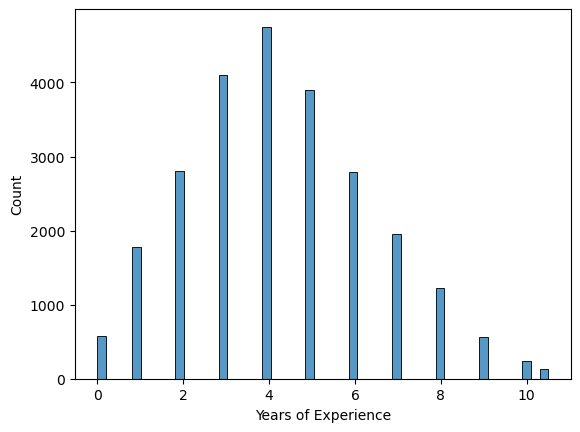

In [49]:
sns.histplot(df['Years of Experience'])

# Feature Selection


### There is some columns we won't use it in our anaysis so we will remove it

In [50]:
df.head()

,Unnamed: 0,Job Posting ID,Job Posting Date,Job Title,Job Title Full,Job Position Type,Job Position Level,Years of Experience,Job Skills,Job Location,Number of Applicants,Company Name,Company Industry,Company Size
0,0,2701524240,01/01/2017,Software Engineer,Software Engineer,Full-time,Entry level,1.0,"['database', 'javascript', 'agile', 'linux', '...",United States,6.000000,"Cardinal Financial Company, Limited Partnership",Financial Services,"1,001-5,000 employees"
1,1,2719108338,01/01/2017,Data Engineer,Senior Azure Data Engineer,Full-time,Mid-Senior level,2.0,"['data_lake', 'cloud', 'python', 'spark', 'git...",United States,1.000000,Brinks Home,Consumer Electronics,"1,001-5,000 employees"
2,2,2719503370,01/01/2017,Software Engineer,Software Engineer I,Full-time,Entry level,5.0,"['mongo', 'oracle', 'microsoft', 'css', 'javas...",United States,16.000000,Paycor,Computer Software,"1,001-5,000 employees"
3,3,2734877741,01/01/2017,Business Analyst,Associate Business Analyst,Full-time,Entry level,2.0,"['agile', 'excel']","Phoenix, AZ",1.000000,Optum,Hospital & Health Care,"10,001+ employees"
4,4,2752415616,01/01/2017,Developer,Swift Developer,Contract,Mid-Senior level,4.0,"['excel', 'back-end', 'ios', 'swift', 'program...","Richmond, CA",14.829052,Toptal,Internet,"1,001-5,000 employees"


In [148]:
df.drop('Job Posting ID',axis=1,inplace=True)

In [149]:
df.head()

,hii,Job Posting Date,Job Title,Job Title Full,Job Position Type,Job Position Level,Years of Experience,Job Skills,Job Location,Number of Applicants,Company Name,Company Industry,Company Size
0,0,01/01/2017,Software Engineer,Software Engineer,Full-time,Entry level,1,"['database', 'javascript', 'agile', 'linux', '...",United States,6.000000,"Cardinal Financial Company, Limited Partnership",Financial Services,"1,001-5,000 employees"
1,1,01/01/2017,Data Engineer,Senior Azure Data Engineer,Full-time,Mid-Senior level,2,"['data_lake', 'cloud', 'python', 'spark', 'git...",United States,1.000000,Brinks Home,Consumer Electronics,"1,001-5,000 employees"
2,2,01/01/2017,Software Engineer,Software Engineer I,Full-time,Entry level,5,"['mongo', 'oracle', 'microsoft', 'css', 'javas...",United States,16.000000,Paycor,Computer Software,"1,001-5,000 employees"
3,3,01/01/2017,Business Analyst,Associate Business Analyst,Full-time,Entry level,2,"['agile', 'excel']","Phoenix, AZ",1.000000,Optum,Hospital & Health Care,"10,001+ employees"
4,4,01/01/2017,Developer,Swift Developer,Contract,Mid-Senior level,4,"['excel', 'back-end', 'ios', 'swift', 'program...","Richmond, CA",14.829052,Toptal,Internet,"1,001-5,000 employees"


In [150]:
df.shape

(24830, 13)

In [151]:
df.drop(df.columns[0], axis=1, inplace=True)

In [152]:
df.head()

,Job Posting Date,Job Title,Job Title Full,Job Position Type,Job Position Level,Years of Experience,Job Skills,Job Location,Number of Applicants,Company Name,Company Industry,Company Size
0,01/01/2017,Software Engineer,Software Engineer,Full-time,Entry level,1,"['database', 'javascript', 'agile', 'linux', '...",United States,6.000000,"Cardinal Financial Company, Limited Partnership",Financial Services,"1,001-5,000 employees"
1,01/01/2017,Data Engineer,Senior Azure Data Engineer,Full-time,Mid-Senior level,2,"['data_lake', 'cloud', 'python', 'spark', 'git...",United States,1.000000,Brinks Home,Consumer Electronics,"1,001-5,000 employees"
2,01/01/2017,Software Engineer,Software Engineer I,Full-time,Entry level,5,"['mongo', 'oracle', 'microsoft', 'css', 'javas...",United States,16.000000,Paycor,Computer Software,"1,001-5,000 employees"
3,01/01/2017,Business Analyst,Associate Business Analyst,Full-time,Entry level,2,"['agile', 'excel']","Phoenix, AZ",1.000000,Optum,Hospital & Health Care,"10,001+ employees"
4,01/01/2017,Developer,Swift Developer,Contract,Mid-Senior level,4,"['excel', 'back-end', 'ios', 'swift', 'program...","Richmond, CA",14.829052,Toptal,Internet,"1,001-5,000 employees"


In [153]:
df.shape

(24830, 12)

# Overview on our data

In [154]:
job_counts = df['Job Title Full'].value_counts()
print(job_counts)

Software Engineer                                     2124
Senior Data Engineer                                  1612
Senior Software Engineer                              1589
Data Scientist                                        1136
Data Engineer                                          907
                                                      ... 
Machine Learning Engineer, Viral Projects                1
Senior Analyst, Growth                                   1
Marketing Data Operations Manager                        1
Servicenow Software Engineer                             1
Software Developer, Reputation And Anti-Abuse Team       1
Name: Job Title Full, Length: 4336, dtype: int64


Full-time     19782
Contract       4933
Internship       47
Part-time        41
Temporary        25
Volunteer         2
Name: Job Position Type, dtype: int64


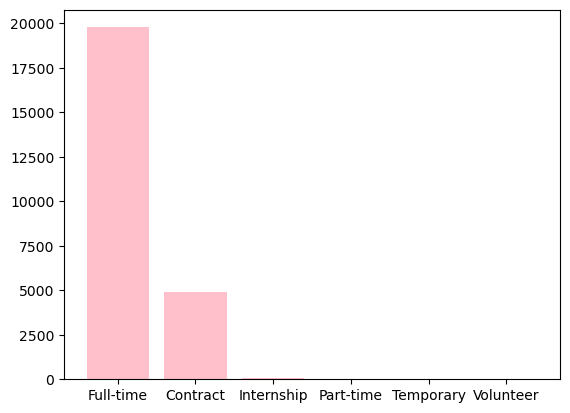

In [123]:
types = df['Job Position Type'].value_counts()
print(types)
plt.bar(types.keys(),types,align='center',color='pink')
plt.show()

It seems that the full time and contract are the most type of jobs required


Mid-Senior level    13401
Associate            7027
Entry level          4085
Director              206
Internship             82
Executive              29
Name: Job Position Level, dtype: int64


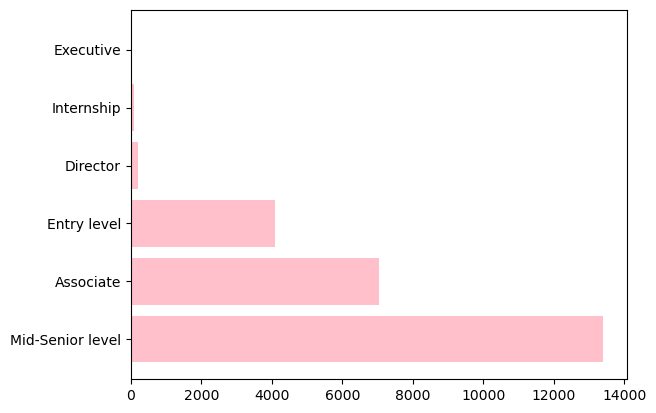

In [115]:
types = df['Job Position Level'].value_counts()
print(types)
plt.barh(types.keys(),types,align='center',color ='pink')
plt.show()

Mid- Senior level and Associate are in demand more than others

4.0     4752
3.0     4097
5.0     3900
2.0     2806
6.0     2785
7.0     1953
1.0     1782
8.0     1228
0.0      582
9.0      562
10.0     246
10.5     137
Name: Years of Experience, dtype: int64


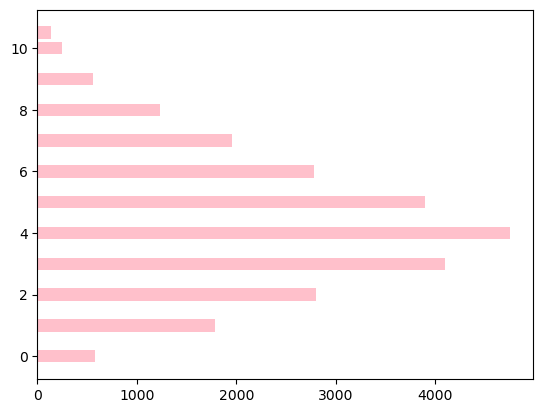

In [125]:
types = df['Years of Experience'].value_counts()
print(types)
plt.barh(types.keys(),types,align='center',color ='pink',height=0.4)
plt.show()

In [127]:
types = df['Job Location'].value_counts()
print(types)

United States             5058
San Francisco, CA          846
New York, NY               795
Chicago, IL                617
Austin, TX                 500
                          ... 
Bedminster, NJ               1
Location, WV                 1
Round Lake Heights, IL       1
Lexington, MA                1
Asheville, NC                1
Name: Job Location, Length: 1161, dtype: int64


In [131]:
types = df['Company Industry'].value_counts()
print(types)

Internet                             5051
Computer Software                    4729
Information Technology & Services    4451
Staffing & Recruiting                3664
Financial Services                   1227
                                     ... 
Libraries                               1
Newspapers                              1
Primary/Secondary Education             1
Glass, Ceramics & Concrete              1
Think Tanks                             1
Name: Company Industry, Length: 117, dtype: int64


# We will put Our last dataset in an excel

In [155]:
df.to_excel('New-Job.xlsx', index=False)

### To help ourselves in visualizing the most skills needed in the jobs we will split it and put it in a sheet

In [163]:
skills_count = df['Job Skills'].str.split(', ', expand=True).stack().value_counts()
skills_df = pd.DataFrame({'Skill': skills_count.index, 'Count': skills_count.values}).reset_index(drop=True)
print(skills_df)

              Skill  Count
0          'python'   6832
1             'aws'   6668
2             'sql'   6021
3     'programming'   4924
4           'agile'   4642
..              ...    ...
526         'perl']      1
527      'node.js']      1
528  ['scrum/agile'      1
529       'rshiny']      1
530          'lua']      1

[531 rows x 2 columns]


In [164]:
skills_df.to_excel('jobSkills.xlsx', index=False)

# Data Visualization Using Tableau 

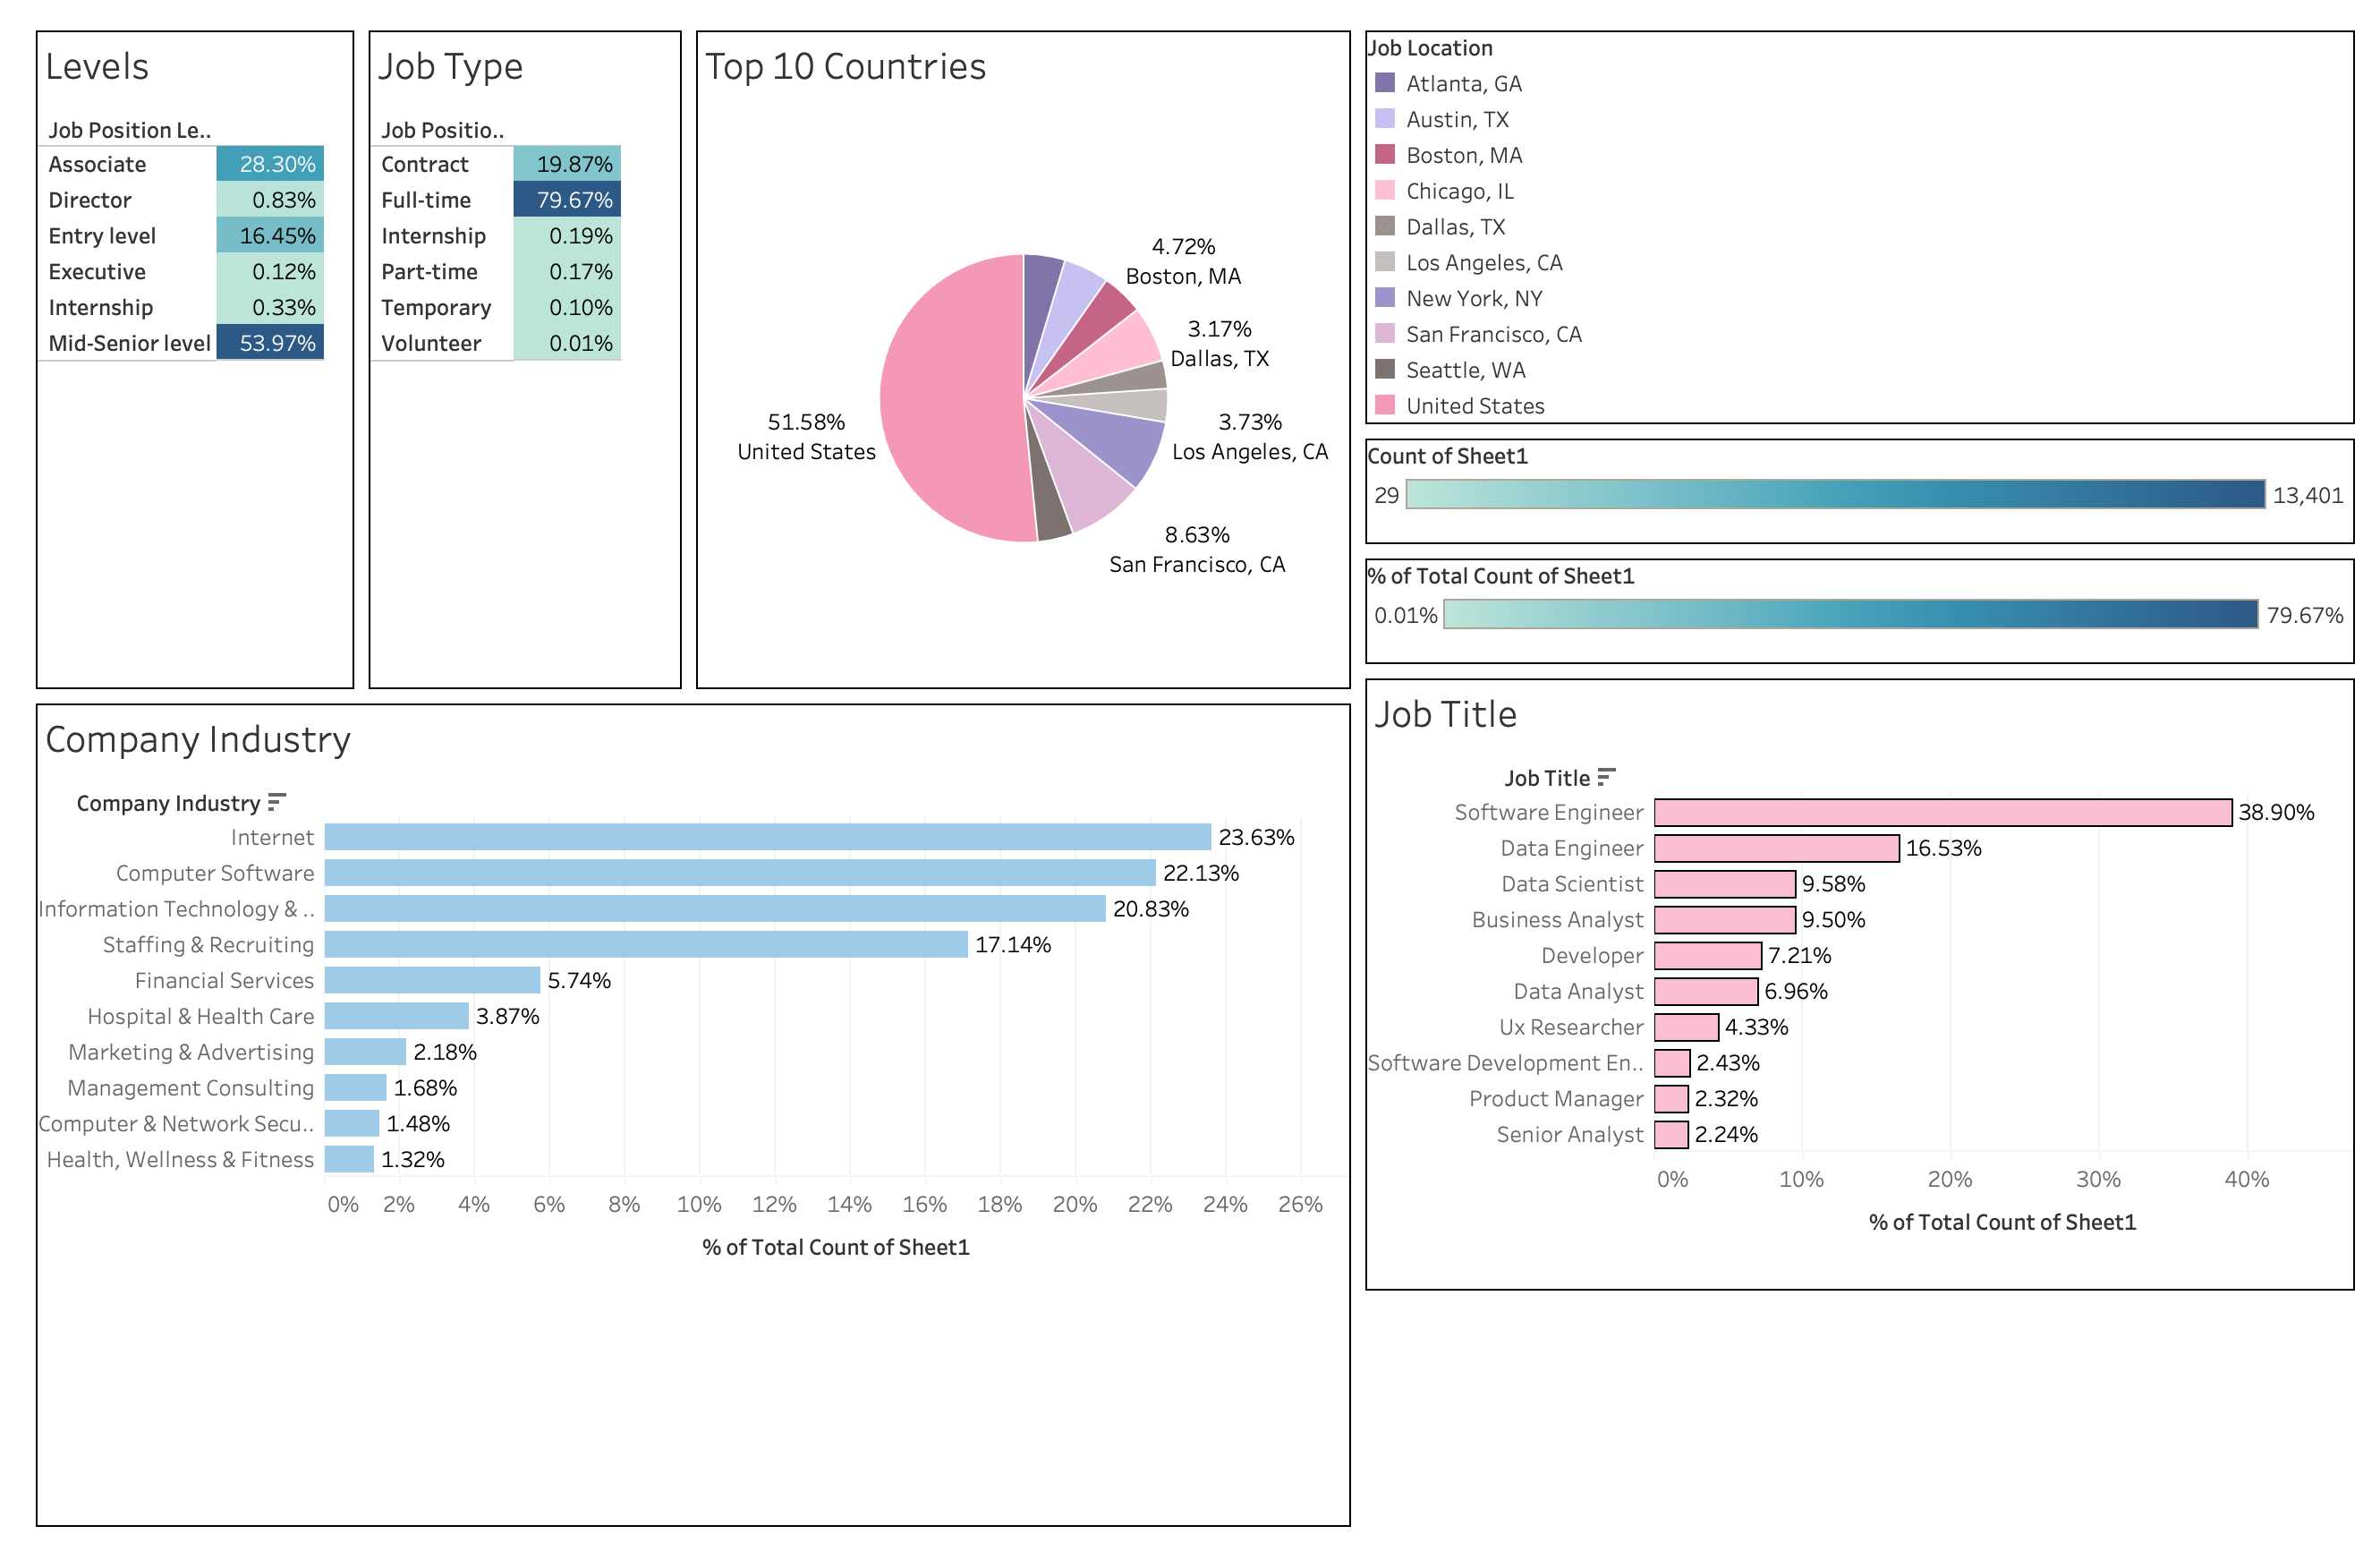

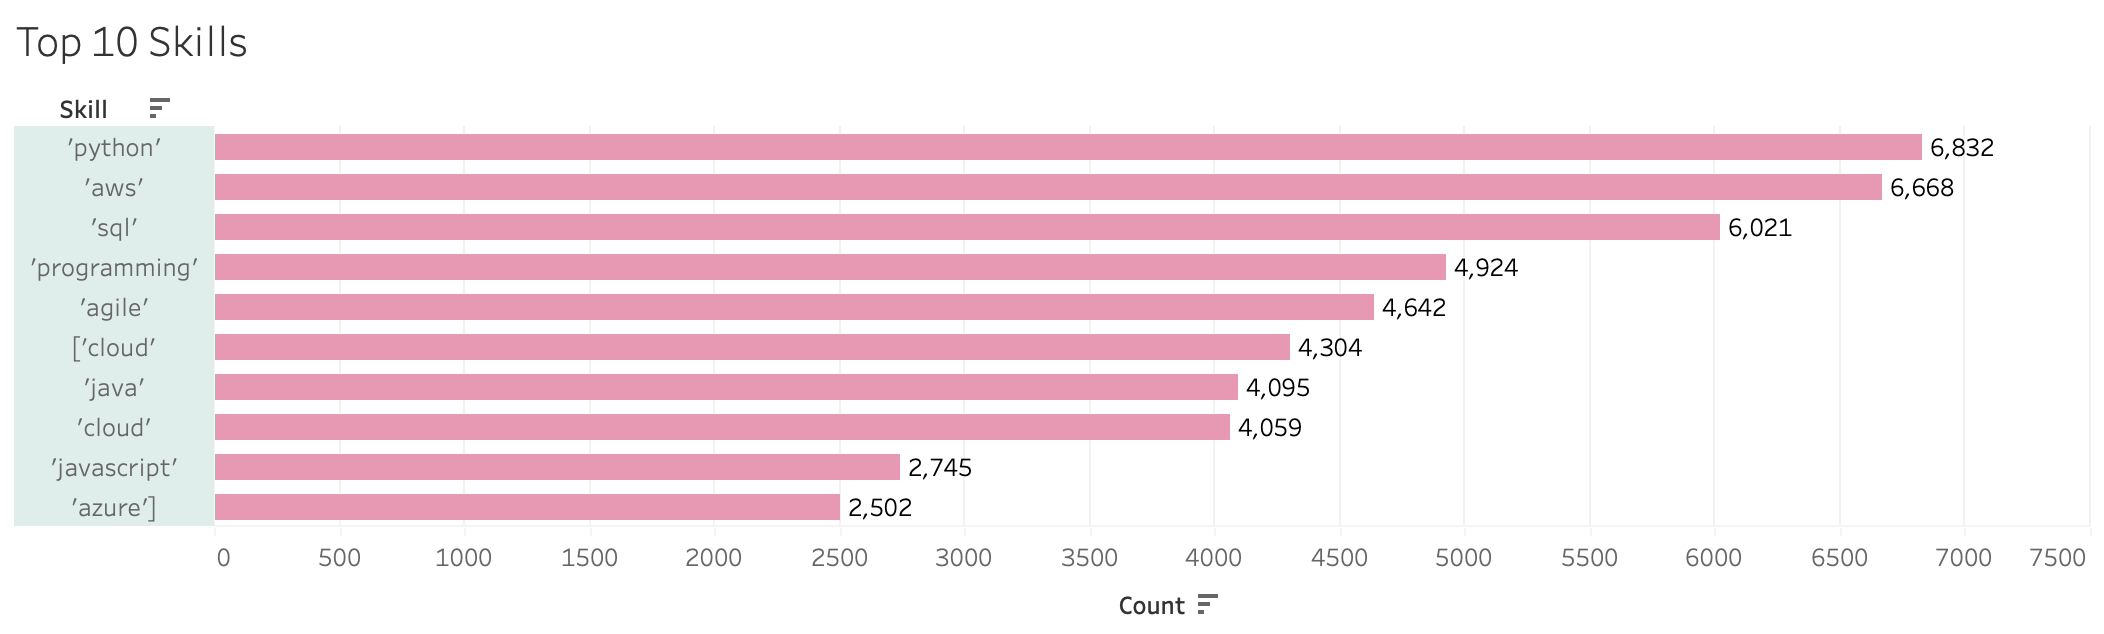

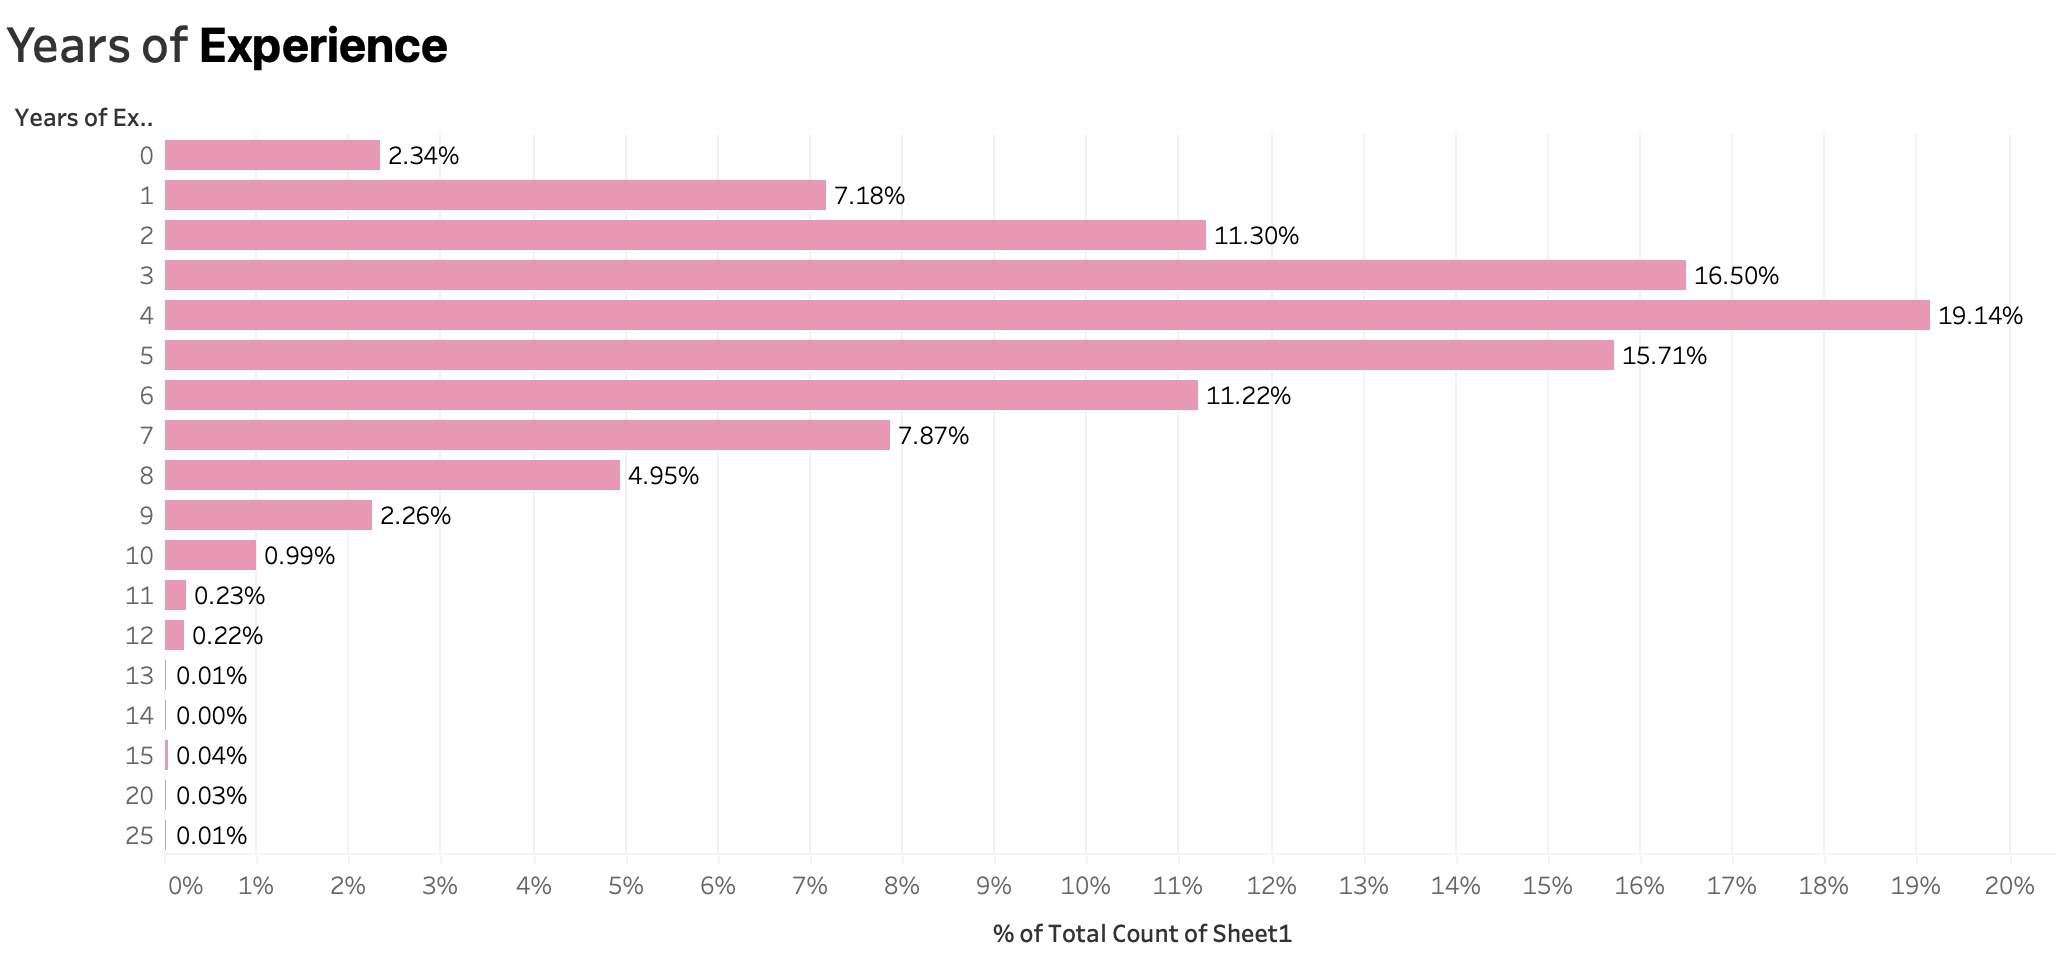

# Conclusion

## After we Visualize the data we conclude that:
### 1- The Most Demand position is Software enginner.
### 2- Most of positions located at US.
### 3- Python is required in most of the jobs.
### 4- 4 years of Experience is perfect to apply for 20% of offers.